<a href="https://colab.research.google.com/github/SebastianBartaburu/DataSet-DS/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El dataset trabajada en estas instancias es de una empresa que vende productos para bebes , este mismo tiene la informacion del bimestre abril-mayo.

Las consignas planteadas para analisar son:
 1- Como trabajaron las tiendas en el bimestre transcurrido?

 2- Cuantas Ventas se cargan por fecha?

 3-Observar los productos que mas rotacion tienen en nuestro mercado y la cantidad de ventas de los mismos por tienda o de manera ONLINE.

 4-Si bien no todo es Ventas tambien poder ver los productos principales que nos devuelven valores negativos y encontrar solucion a esos problemas, ya sea por una devolucion por disconformidad o producto defectuoso.

In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [58]:
from google.colab import files

In [59]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Data Science Proyecto Final/DATASET.xlsx')
df.shape


(21857, 22)

In [ ]:
df.head()

,Canal,Venta ID,Venta Tipo,Id_Provincia,Cliente Provincia,Cliente Tipo,Metodo de Pago,Producto,Producto Categoria,Clasificacion,...,Producto Sku,Tipo Cupon,Venta Fecha Carga,Venta Fecha Entrega,Forma de entrega,Tienda,ID_Tienda,Tipo Reintegro,Precio Venta,Venta Mes
0,TIENDA,3743,VENTA,P3,Capital Federal,MINORISTA,EFECTIVO,SI,Cochecitos,A,...,CO019-NM,NONE,2021-04-24,2021-04-24,RETIRA,Tienda Balvanera,T100,NO APLICA,17999.0,4
1,TIENDA,3853,VENTA,P2,Buenos Aires-GBA,MINORISTA,EFECTIVO,SI,Cunas,A,...,CH003,NONE,2021-04-26,2021-04-26,RETIRA,Tienda Quilmes,T200,NO APLICA,4999.0,4
2,TIENDA,3853,VENTA,P2,Buenos Aires-GBA,MINORISTA,EFECTIVO,SI,Cunas,A,...,CU007-GR,NONE,2021-04-08,2021-04-08,RETIRA,Tienda Quilmes,T200,NO APLICA,16999.0,4
3,TIENDA,3853,VENTA,P2,Buenos Aires-GBA,MINORISTA,EFECTIVO,SI,Cunas,A,...,INF20,NONE,2021-04-26,2021-04-26,RETIRA,Tienda Quilmes,T200,NO APLICA,1999.0,4
4,TIENDA,8734,VENTA,P3,Capital Federal,MINORISTA,EFECTIVO,SI,Cochecitos,A,...,CO017-NG,NONE,2021-04-10,2021-04-10,RETIRA,Tienda Balvanera,T100,NO APLICA,18999.0,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21857 entries, 0 to 21856
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Canal                   21857 non-null  object        
 1   Venta ID                21857 non-null  int64         
 2   Venta Tipo              21857 non-null  object        
 3   Id_Provincia            21857 non-null  object        
 4   Cliente Provincia       21857 non-null  object        
 5   Cliente Tipo            21857 non-null  object        
 6   Metodo de Pago          21857 non-null  object        
 7   Producto                21857 non-null  object        
 8   Producto Categoria      21781 non-null  object        
 9   Clasificacion           21568 non-null  object        
 10  Producto Color          17388 non-null  object        
 11  Producto Nombre         21857 non-null  object        
 12  Producto Sub-Categoria  21568 non-null  object

In [ ]:
df.columns

Index(['Canal', 'Venta ID', 'Venta Tipo', 'Id_Provincia', 'Cliente Provincia',
       'Cliente Tipo', 'Metodo de Pago', 'Producto', 'Producto Categoria',
       'Clasificacion ', 'Producto Color', 'Producto Nombre',
       'Producto Sub-Categoria', 'Producto Sku', ' Tipo Cupon',
       'Venta Fecha Carga', 'Venta Fecha Entrega', 'Forma de entrega',
       'Tienda', 'ID_Tienda', ' Tipo Reintegro', 'Precio Venta', 'Venta Mes'],
      dtype='object')

In [ ]:
df.dtypes

Canal                             object
Venta ID                           int64
Venta Tipo                        object
Id_Provincia                      object
Cliente Provincia                 object
Cliente Tipo                      object
Metodo de Pago                    object
Producto                          object
Producto Categoria                object
Clasificacion                     object
Producto Color                    object
Producto Nombre                   object
Producto Sub-Categoria            object
Producto Sku                      object
 Tipo Cupon                       object
Venta Fecha Carga         datetime64[ns]
Venta Fecha Entrega       datetime64[ns]
Forma de entrega                  object
Tienda                            object
ID_Tienda                         object
 Tipo Reintegro                   object
Precio Venta                     float64
Venta Mes                          int32
dtype: object

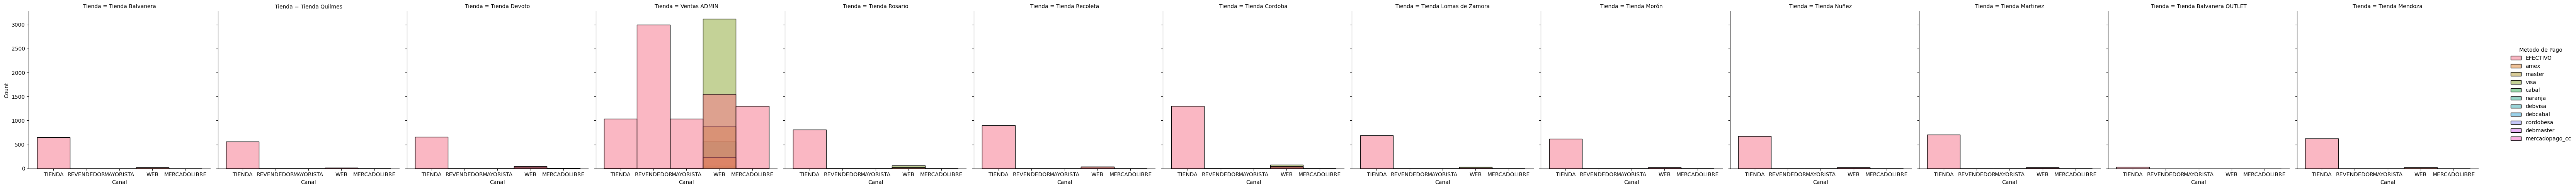

In [ ]:
sns.displot(data=df,x="Canal", hue="Metodo de Pago", col="Tienda")

Que tipos de venta recibe cada tienda y de que manera son efectuados los metodos de pago


<Axes: xlabel='Venta Fecha Carga', ylabel='Venta ID'>

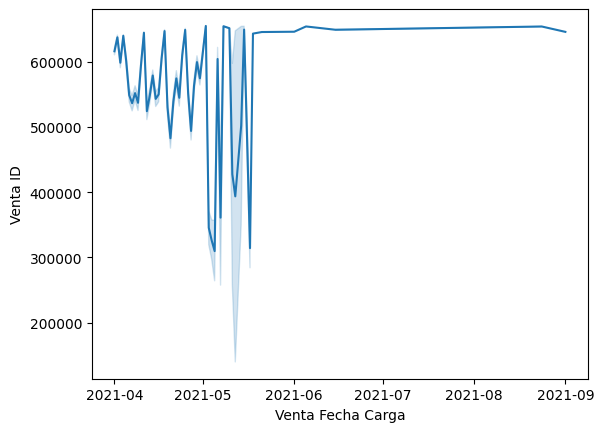

In [104]:
sns.lineplot(data=df, x="Venta Fecha Carga", y="Venta ID")


En este grafico se puede observar la cantidad de ventas cargadas conforme al transcurso del bimestre.

In [ ]:
Conteo_Tiendas= df['Tienda'].value_counts()

print(Conteo_Tiendas)

Tienda
Ventas ADMIN               12815
Tienda Cordoba              1483
Tienda Recoleta              971
Tienda Rosario               940
Tienda Martinez              762
Tienda Lomas de Zamora       755
Tienda Devoto                741
Tienda Nuñez                 716
Tienda Balvanera             705
Tienda Mendoza               670
Tienda Morón                 665
Tienda Quilmes               601
Tienda Balvanera OUTLET       33
Name: count, dtype: int64


In [ ]:
Mas_Vendidos= df['Producto Nombre']
print(Mas_Vendidos)


0           Cochecito CICI con Accesorios Negro Melange
1                Colchon Matelaseado Impermeable Blanco
2                                Practicuna Genova Gris
3                               Sábana Carestino Bosque
4                  Cochecito SMART con Accesorios Negro
                              ...                      
21852             Funda impermeable para colchon Blanco
21853                    Sábana Carestino estrella gris
21854    Pelela Entrenamiento 3 en 1 con Reductor Verde
21855                           Silla de Comer RIO Azul
21856                           Silla de Comer RIO Rosa
Name: Producto Nombre, Length: 21857, dtype: object


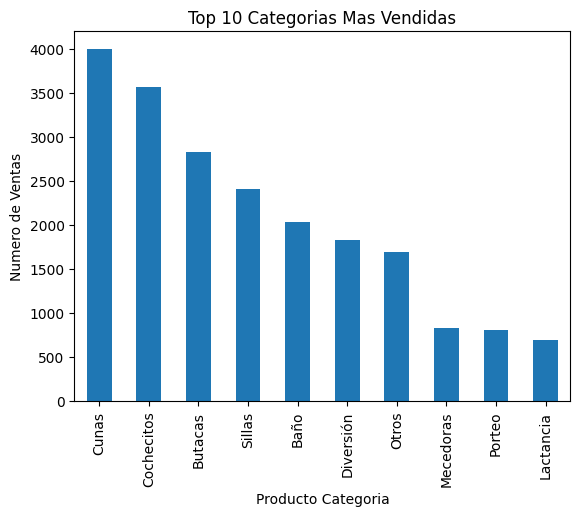

In [101]:
Mas_Vendidos_Productos = df.groupby('Producto Categoria')['Venta ID'].count().sort_values(ascending=False).head(10)

Mas_Vendidos_Productos.plot(kind='bar')

plt.title('Top 10 Categorias Mas Vendidas')
plt.xlabel('Producto Categoria')
plt.ylabel('Numero de Ventas')
plt.show()

En este grafico vemos las categorias mas vendiddas , teniendo en cuenta que OTROS - son piezas de productos.

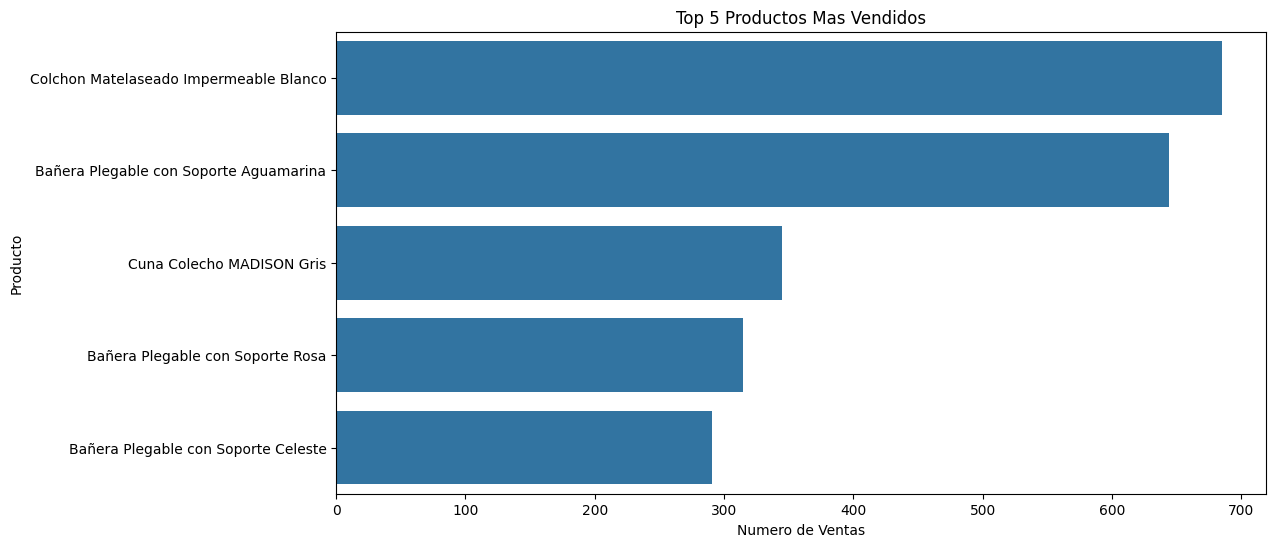

In [99]:
df_top5_productos = df['Producto Nombre'].value_counts().head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=df_top5_productos.values, y=df_top5_productos.index)
plt.xlabel('Numero de Ventas')
plt.ylabel('Producto')
plt.title('Top 5 Productos Mas Vendidos')
plt.show()

Top de prodructos mas vendidos en el periodo.

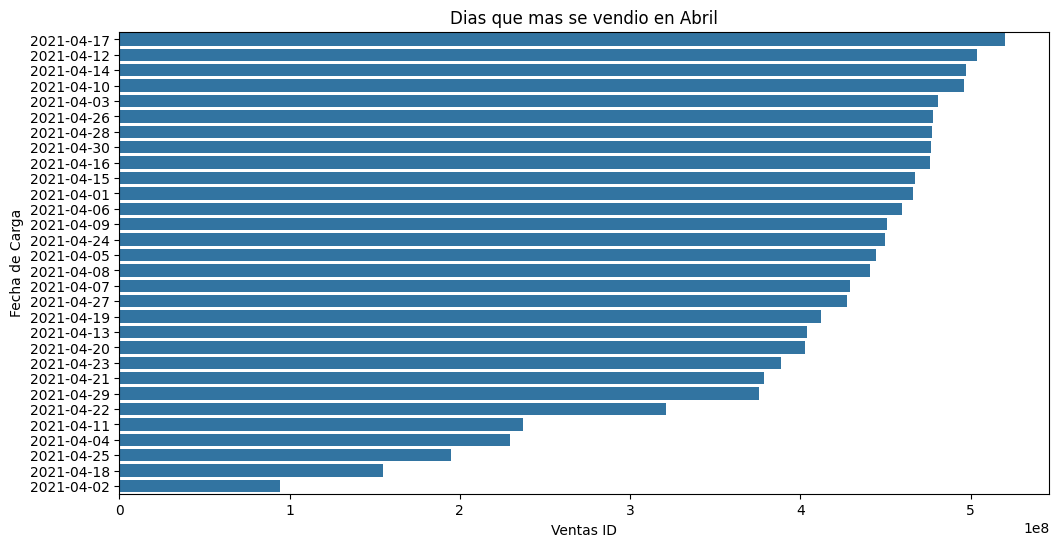

In [116]:
df_abril = df[df['Venta Fecha Carga'].dt.month==4]
df_abril_ventas =df_abril.groupby('Venta Fecha Carga')['Venta ID'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_abril_ventas.values,y=df_abril_ventas.index)
plt.xlabel('Ventas ID')
plt.ylabel('Fecha de Carga')
plt.title('Dias que mas se vendio en Abril')
plt.show()


Un grafico ordenado por los dias que mas se vendio, para analizar que factores externos u internos son lo que lo generaron (clima , publicidad , ofertas , entre otros)

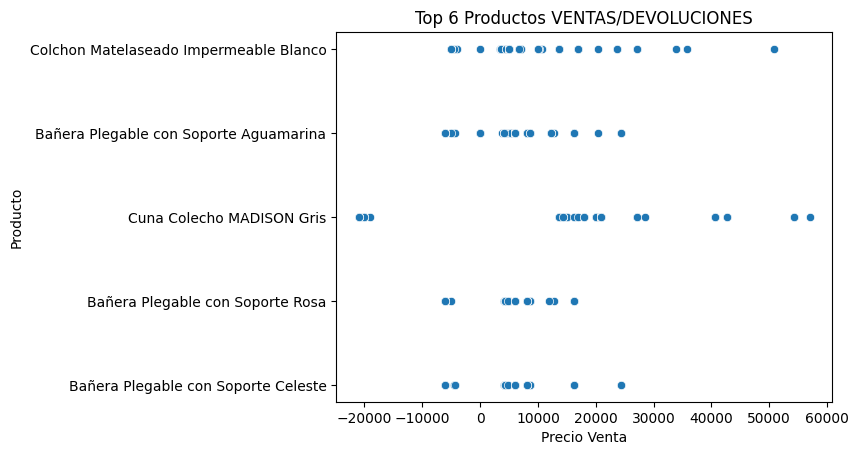

In [156]:
df_top5_productos =df['Producto Nombre'].value_counts().head(5)
df_abril=df[df['Venta Fecha Carga'].dt.month==4]
df_abril_top5 =df_abril[df_abril['Producto Nombre'].isin(df_top5_productos.index)]

sns.scatterplot(data=df_abril_top5, x="Precio Venta", y="Producto Nombre")

plt.xlabel('Precio Venta')

plt.ylabel('Producto')

plt.title('Top 6 Productos VENTAS/DEVOLUCIONES')

plt.show()


Grafico en el que podemos ver la cantidad de puntos de reintegro de dinero al cliente por error/falla de venta completa.
